##Group Assignment

In [2]:
import pip
def import_or_install(package):
    try:
        __import__(package)
    except ImportError:
        pip.main(['install', package])

import math
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import_or_install('pingouin') # We need this library to have our normality test graph
import pingouin as pg
import statistics as sta

path = 'https://raw.githubusercontent.com/prof-apartida/data-exercises/main/'
df = pd.read_csv(path+'Housing1.csv')
print(df.head())


/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:31: UserWarning: Setuptools is replacing distutils. Support for replacing an already imported distutils is deprecated. In the future, this condition will fail. Register concerns at https://github.com/pypa/setuptools/issues/new?template=distutils-deprecation.yml
  warnings.warn(
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Collecting pingouin

Downloading pingouin-0.5.5-py3-none-any.whl.metadata (19 kB)

Requirement already satisfied: matplotlib in /usr/local/lib/python3.10/dist-packages (from pingouin) (3.7.1)

Requirement already satisfied: numpy in /usr/local/lib/python3.10/dist-packages (from pingouin) (1.26.4)

Requirement already satisfied: pandas>=1.5 in /usr/local/lib/python3.10/dist-packages (from pingouin) (2.2.2)

Collecting pandas-flavor (from pingouin)

Downloading pandas_flavor-0.6.0-py3-none-any.whl.metadata (6.3 kB)

Requirement already satisfied: scikit-learn>=1.2 in /usr/local/lib/python3.10/dist-packages (from pingouin) (1.5.2)

Requirement already satisfied: scipy in /usr/local/lib/python3.10/dist-packages (from pingouin) (1.13.1)

Requirement already satisfied: seaborn in /usr/local/lib/python3.10/dist-packages (from pingouin) (0.13.2)

Requirement already satisfied: statsmodels in /usr/local/lib/python3.10/dist-packages (from pingouin) (0.14.4)

Requirement already satisfied: tabulate in /usr/local/lib/python3.10/dist-packages (from pingouin) (0.9.0)

Requirement already satisfied: python-dateutil>=2.8.2 in /usr/local/lib/python3.10/dist-packages (from pandas>=1.5->pingouin) (2.8.2)

Requirement already satisfied: pytz>=2020.1 in /usr/local/lib/python3.10/dist-packages (from pandas>=1.5->pingouin) (2024.2)

Requirement already satisfied: tzdata>=2022.7 in /usr/local/lib/python3.10/dist-packages (from pandas>=1.5->pingouin) (2024.2)

Requirement already satisfied: joblib>=1.2.0 in /usr/local/lib/python3.10/dist-packages (from scikit-learn>=1.2->pingouin) (1.4.2)

Requirement already satisfied: threadpoolctl>=3.1.0 in /usr/local/lib/python3.10/dist-packages (from scikit-learn>=1.2->pingouin) (3.5.0)

Requirement already satisfied: contourpy>=1.0.1 in /usr/local/lib/python3.10/dist-packages (from matplotlib->pingouin) (1.3.0)

Requirement already satisfied: cycler>=0.10 in /usr/local/lib/python3.10/dist-packages (from matplotlib->pingouin) (0.12.1)

Requirement already satisfied: fonttools>=4.22.0 in /usr/local/lib/python3.10/dist-packages (from matplotlib->pingouin) (4.54.1)

Requirement already satisfied: kiwisolver>=1.0.1 in /usr/local/lib/python3.10/dist-packages (from matplotlib->pingouin) (1.4.7)

Requirement already satisfied: packaging>=20.0 in /usr/local/lib/python3.10/dist-packages (from matplotlib->pingouin) (24.1)

Requirement already satisfied: pillow>=6.2.0 in /usr/local/lib/python3.10/dist-packages (from matplotlib->pingouin) (10.4.0)

Requirement already satisfied: pyparsing>=2.3.1 in /usr/local/lib/python3.10/dist-packages (from matplotlib->pingouin) (3.2.0)

Requirement already satisfied: xarray in /usr/local/lib/python3.10/dist-packages (from pandas-flavor->pingouin) (2024.9.0)

Requirement already satisfied: patsy>=0.5.6 in /usr/local/lib/python3.10/dist-packages (from statsmodels->pingouin) (0.5.6)

Requirement already satisfied: six in /usr/local/lib/python3.10/dist-packages (from patsy>=0.5.6->statsmodels->pingouin) (1.16.0)

Downloading pingouin-0.5.5-py3-none-any.whl (204 kB)

Output()

Downloading pandas_flavor-0.6.0-py3-none-any.whl (7.2 kB)

Installing collected packages: pandas-flavor, pingouin

Successfully installed pandas-flavor-0.6.0 pingouin-0.5.5

     price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  4473000  3162         3          1        2      yes        no       no   
1  4613000  4510         4          2        2      yes        no      yes   
2  5950000  6420         3          1        1      yes        no      yes   
3  3118850  2398         3          1        1      yes        no       no   
4  4200000  2953         3          1        2      yes        no      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        1       no        furnished  
1              no              no        0       no   semi-furnished  
2              no             yes        0      yes        furnished  
3              no              no        0      yes   semi-furnished  
4              no             yes        0       no      unfurnished  


## Analyse the full dataset:

*   Describe the nature of each variable: numerical, categorical, ordinal.



In [10]:

print('\nprice is a numerical continuous variable that indicates the price of the house')
print('\narea is a numerical continuous variable that indicates the size of the property.')
print('\nbedrooms is a numerical discrete variable that indicates the number of bedrooms in the house.')
print('\nbathrooms is a numerical discrete variable that indicates the number of bathrooms in the house.')
print('\nstories is a numerical discrete variable that indicates the number of floors in the property.')
print('\nmainroad is a boolean variable that indicates if the property is connected to a mainroad.')
print('\nguestroom is a boolean variable that indicates if the property has a guestroom.')
print('\nbasement is a boolean variable that indicates if the property has a basement.')
print('\nhotwaterheating is a boolean variable that indicates if the property has a water heating system.')
print('\nairconditioning is a boolean variable that indicates if the property has an air conditioning device.')
print('\nparking is a discrete variable that indicates the number of vehicle parking slots the house has.')
print('\nprefarea is a boolean variable that indicates if the property is located in the preferred neighbourhood of the city.')
print('\nfurnishingstatus is a categorical variable that indicates the furnishing status of the house.')



price is a numerical continuous variable that indicates the price of the house

area is a numerical continuous variable that indicates the size of the property.

bedrooms is a numerical discrete variable that indicates the number of bedrooms in the house.

bathrooms is a numerical discrete variable that indicates the number of bathrooms in the house.

stories is a numerical discrete variable that indicates the number of floors in the property.

mainroad is a boolean variable that indicates if the property is connected to a mainroad.

guestroom is a boolean variable that indicates if the property has a guestroom.

basement is a boolean variable that indicates if the property has a basement.

hotwaterheating is a boolean variable that indicates if the property has a water heating system.

airconditioning is a boolean variable that indicates if the property has an air conditioning device.

parking is a discrete variable that indicates the number of vehicle parking slots the house has.

p

## Analyse the full dataset:

*   Add the main statistics depending on the nature of each variable:  mean, median, mode, sd, IQR, quartiles, range

In [11]:
print(df.head())
print('\n\n')
def print_stats(df,variable):
  print(f'Main statistics of variable {variable}')
  print('Mean:',"{:,.2f}".format(df[variable].mean()))
  print('Median:',"{:,.2f}".format(sta.median(df[variable])))
  print('Mode:',"{:,.2f}".format(sta.mode(df[variable])))
  print('SD:',"{:,.2f}".format(df[variable].std()))
  print('Q1:',"{:,.2f}".format(np.percentile(df[variable], 25)))
  print('Q2:',"{:,.2f}".format(np.percentile(df[variable], 50)))
  print('Q3:',"{:,.2f}".format(np.percentile(df[variable], 75)))
  print('Q4/Max:',"{:,.2f}".format(np.percentile(df[variable], 100)))
  print('IQR:', "{:,.2f}".format(np.percentile(df[variable], 75) - np.percentile(df[variable], 25)))
  print('Range:',"{:,.2f}".format(max(df[variable])-min(df[variable])))

print_stats(df,'price')
print('\n')
print_stats(df,'area')
print('\n')
print_stats(df,'bathrooms')
print('\n')
print_stats(df,'stories')
print('\n')
print_stats(df,'parking')
print('\n')
print_stats(df,'bedrooms')

     price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  4473000  3162         3          1        2      yes        no       no   
1  4613000  4510         4          2        2      yes        no      yes   
2  5950000  6420         3          1        1      yes        no      yes   
3  3118850  2398         3          1        1      yes        no       no   
4  4200000  2953         3          1        2      yes        no      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        1       no        furnished  
1              no              no        0       no   semi-furnished  
2              no             yes        0      yes        furnished  
3              no              no        0      yes   semi-furnished  
4              no             yes        0       no      unfurnished  



Main statistics of variable price
Mean: 4,878,074.82
Median: 4,357,500.00
Mode: 4,200,000.00
SD: 1,946

In [ ]:
print('There are ',df['mainroad'].value_counts()['yes'], ' houses connected to the mainroad.\n')
print('There are ',df['guestroom'].value_counts()['yes'], ' houses that have a guestroom.\n')
print('There are ',df['basement'].value_counts()['yes'], ' houses that have a basement.\n')
print('There are ',df['hotwaterheating'].value_counts()['yes'], ' houses with a water heating system.\n')
print('There are ',df['airconditioning'].value_counts()['yes'], ' houses with an air conditioning system.\n')
print('There are ',df['prefarea'].value_counts()['yes'], ' houses in the preferred neighborhood.\n')
print('There are ',df['furnishingstatus'].value_counts()['furnished'], ' furnished houses,',
    df['furnishingstatus'].value_counts()['semi-furnished'],' partially furnished houses, and ',
    df['furnishingstatus'].value_counts()['unfurnished'], ' unfurnished houses.')

There are  238  houses connected to the mainroad.

There are  47  houses that have a guestroom.

There are  95  houses that have a basement.

There are  17  houses with a water heating system.

There are  78  houses with an air conditioning system.

There are  70  houses in the preferred neighborhood.

There are  75  furnished houses, 109  partially furnished houses, and  88  unfurnished houses.


## Analyse the full dataset:

*   Create a histogram for each variable.

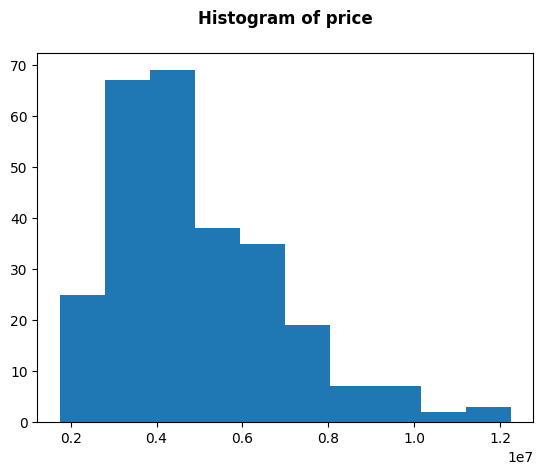

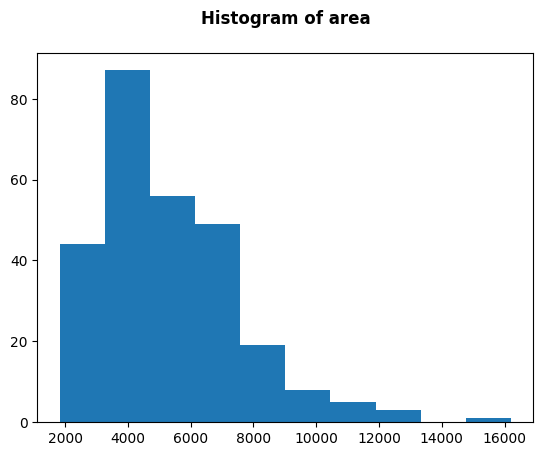

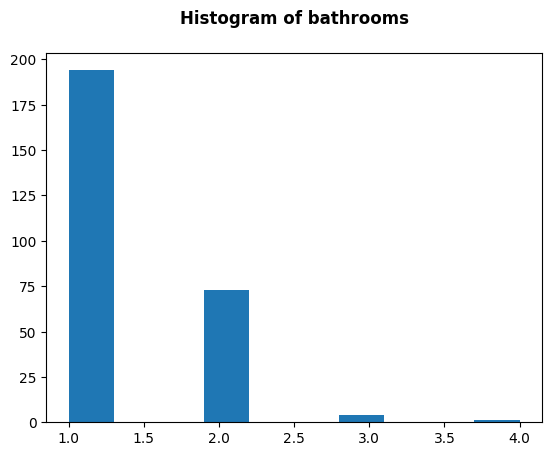

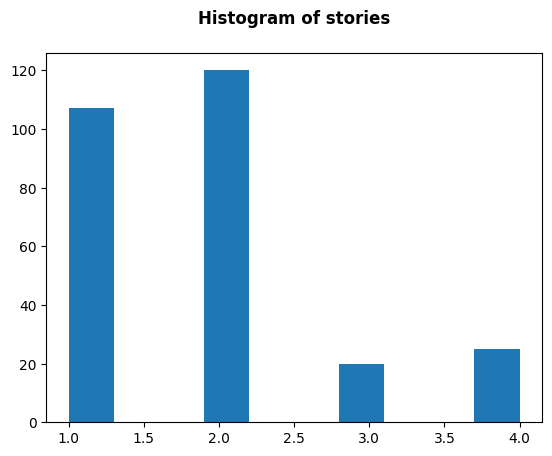

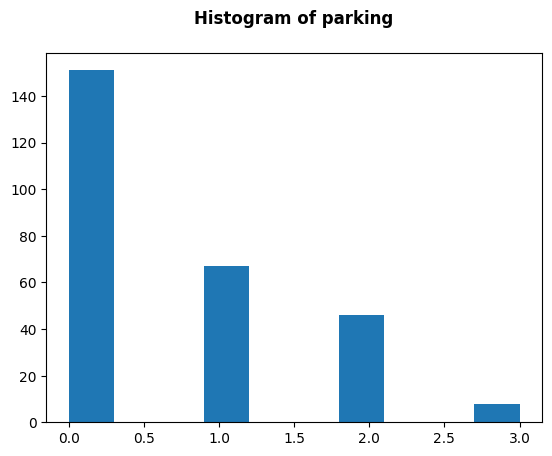

In [12]:
plt.title('Histogram of price\n',
          fontweight = "bold")
plt.show(plt.hist(df['price']))

plt.title('Histogram of area\n',
          fontweight = "bold")
plt.show(plt.hist(df['area']))

plt.title('Histogram of bathrooms\n',
          fontweight = "bold")
plt.show(plt.hist(df['bathrooms']))

plt.title('Histogram of stories\n',
          fontweight = "bold")
plt.show(plt.hist(df['stories']))

plt.title('Histogram of parking\n',
          fontweight = "bold")
plt.show(plt.hist(df['parking']))


## Analyse the full dataset:
*   Create a piechart if the variable is binary.

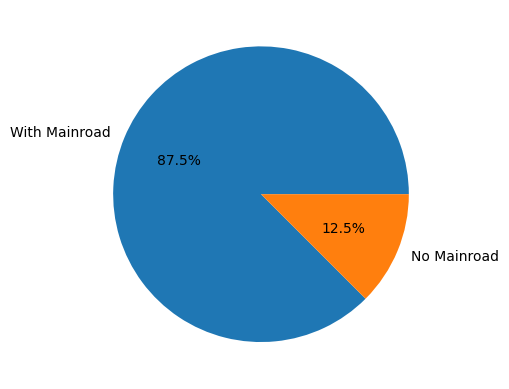

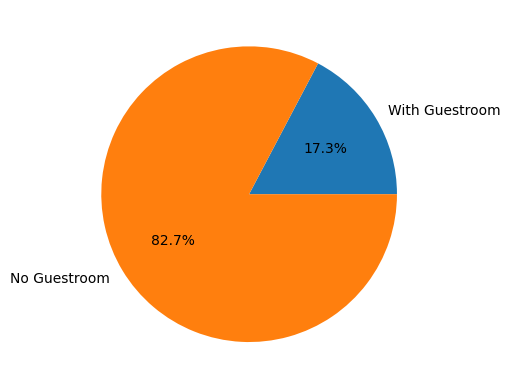

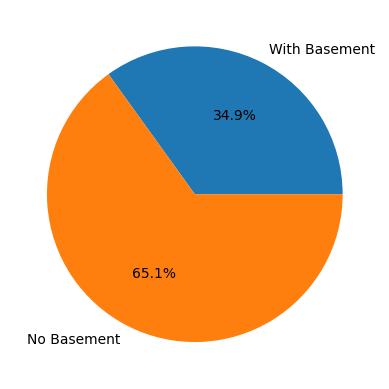

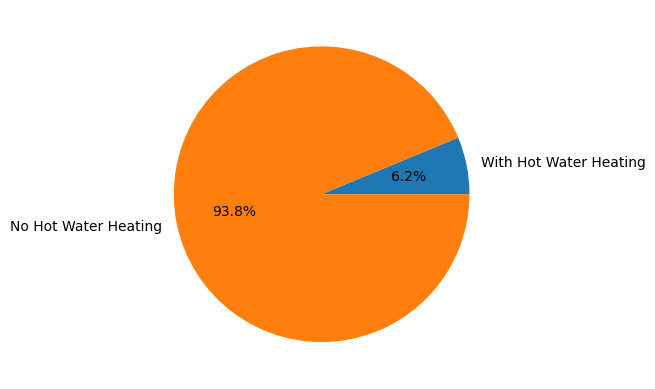

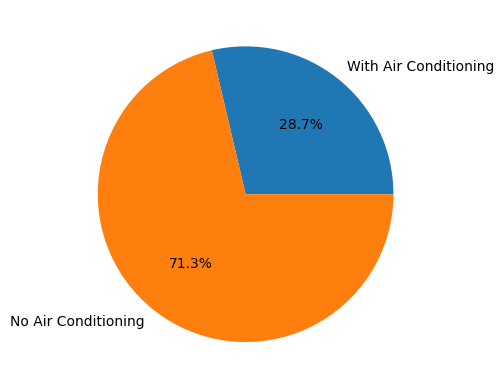

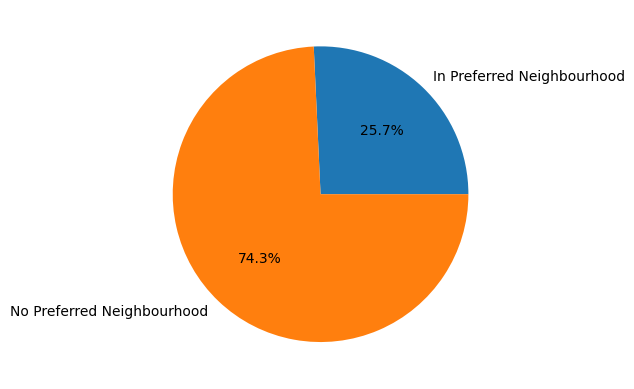

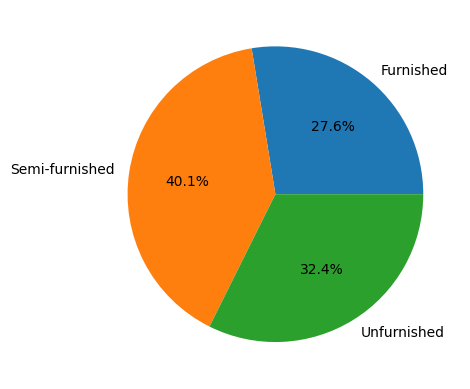

In [13]:
houses_with_mainroad = len(df[(df['mainroad']== 'yes')])
houses_without_mainroad = 272 - houses_with_mainroad

fig, ax = plt.subplots()
ax.pie([houses_with_mainroad, houses_without_mainroad], labels=['With Mainroad', 'No Mainroad'], autopct='%1.1f%%')
plt.show()

houses_with_guestroom = len(df[(df['guestroom']== 'yes')])
houses_without_guestroom = 272 - houses_with_guestroom

fig, ax = plt.subplots()
ax.pie([houses_with_guestroom, houses_without_guestroom], labels=['With Guestroom', 'No Guestroom'], autopct='%1.1f%%')
plt.show()

houses_with_basement = len(df[(df['basement']== 'yes')])
houses_without_basement = 272 - houses_with_basement

fig, ax = plt.subplots()
ax.pie([houses_with_basement, houses_without_basement], labels=['With Basement', 'No Basement'], autopct='%1.1f%%')
plt.show()

houses_with_hotwaterheating = len(df[(df['hotwaterheating']== 'yes')])
houses_without_hotwaterheating = 272 - houses_with_hotwaterheating

fig, ax = plt.subplots()
ax.pie([houses_with_hotwaterheating, houses_without_hotwaterheating], labels=['With Hot Water Heating', 'No Hot Water Heating'], autopct='%1.1f%%')
plt.show()


houses_with_airconditioning = len(df[(df['airconditioning']== 'yes')])
houses_without_airconditioning = 272 - houses_with_airconditioning

fig, ax = plt.subplots()
ax.pie([houses_with_airconditioning, houses_without_airconditioning], labels=['With Air Conditioning', 'No Air Conditioning'], autopct='%1.1f%%')
plt.show()

houses_with_prefarea = len(df[(df['prefarea']== 'yes')])
houses_without_prefarea = 272 - houses_with_prefarea

fig, ax = plt.subplots()
ax.pie([houses_with_prefarea, houses_without_prefarea], labels=['In Preferred Neighbourhood', 'No Preferred Neighbourhood'], autopct='%1.1f%%')
plt.show()

houses_furnished = len(df[(df['furnishingstatus']== 'furnished')])
houses_semifurnished = len(df[(df['furnishingstatus']== 'semi-furnished')])
houses_unfurnished = len(df[(df['furnishingstatus']== 'unfurnished')])

fig, ax = plt.subplots()
ax.pie([houses_furnished, houses_semifurnished, houses_unfurnished], labels=['Furnished', 'Semi-furnished','Unfurnished'], autopct='%1.1f%%')
plt.show()

## Suppose that your dataset is a full population (only for this bulletpoint):
*   Calculate the minimum sample size needed and create a new dataset with this sample size.

In [14]:
N = 272 # Population size
CL = 0.95 # Confidence level
p = 0.5 # Standard Deviation. If unknown, leave it as 0.5
e = 0.05 # Margin of error

alpha_half = (1-CL)/2
Z_score = st.norm.ppf(alpha_half+CL)

n = ((Z_score**2)*p*(1-p))/e**2
sample_size = n/(1+(((Z_score**2)*p*(1-p))/((e**2)*N))) # Sample size for a limited population
print(f'Sample size needed is {"{:,.2f}".format(sample_size)}, which must be rounded up to 160.\n\n')

sample_houses = df.sample(n=160)

print(sample_houses.head())

Sample size needed is 159.24, which must be rounded up to 160.


       price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
167  4270000  4360         4          1        2      yes        no       no   
194  3325000  4775         4          1        2      yes        no       no   
57   5530000  6100         3          2        1      yes        no      yes   
43   7420000  6325         3          1        4      yes        no       no   
173  1750000  2910         3          1        1       no        no       no   

    hotwaterheating airconditioning  parking prefarea furnishingstatus  
167              no              no        0       no        furnished  
194              no              no        0       no      unfurnished  
57               no              no        2      yes        furnished  
43               no             yes        1       no      unfurnished  
173              no              no        0       no        furnished  


## Suppose that your dataset is a full population (only for this bulletpoint):
* Compare the mean of the sample with the population and see if the population fall within the defined confidence interval:

**We will calculate the sample mean for price, area and bedrooms. Then, will check if the population mean of every variable falls within its confidence interval.**

In [15]:
mean_sample_price = sta.mean(sample_houses['price'])
sd_sample_price = sta.stdev(sample_houses['price'])
mean_sample_area = sta.mean(sample_houses['area'])
sd_sample_area = sta.stdev(sample_houses['area'])
mean_sample_bedrooms = sta.mean(sample_houses['bedrooms'])
sd_sample_bedrooms = sta.stdev(sample_houses['bedrooms'])

## Z-score for two tailed 95% confidence level:
z = st.norm.ppf(0.975)

ci_price_from = mean_sample_price-z*(sd_sample_price/math.sqrt(n))
ci_price_to = mean_sample_price+z*(sd_sample_price/math.sqrt(n))

ci_price_from = "{:,.2f}".format(ci_price_from)
ci_price_to = "{:,.2f}".format(ci_price_to)

mean_price = sta.mean(df['price'])
mean_price = "{:,.2f}".format(mean_price)


##Confidence interval for mean of sample price:
print(f'Confidence interval of mean price from {ci_price_from} to {ci_price_to}, compared to a population mean of {mean_price}.')

ci_area_from = mean_sample_area-z*(sd_sample_area/math.sqrt(n))
ci_area_to = mean_sample_area+z*(sd_sample_area/math.sqrt(n))

ci_area_from = "{:,.2f}".format(ci_area_from)
ci_area_to = "{:,.2f}".format(ci_area_to)

mean_area = sta.mean(df['area'])
mean_area = "{:,.2f}".format(mean_area)

##Confidence interval for mean of sample area:
print(f'Confidence interval of mean area from {ci_area_from} to {ci_area_to}, compared to a population mean of {mean_area}.')

ci_bedrooms_from = mean_sample_bedrooms-z*(sd_sample_bedrooms/math.sqrt(n))
ci_bedrooms_to = mean_sample_bedrooms+z*(sd_sample_bedrooms/math.sqrt(n))

ci_bedrooms_from = "{:,.2f}".format(ci_bedrooms_from)
ci_bedrooms_to = "{:,.2f}".format(ci_bedrooms_to)

mean_bedrooms = sta.mean(df['bedrooms'])
mean_bedrooms = "{:,.2f}".format(mean_bedrooms)

##Confidence interval for mean of sample bedrooms:
print(f'Confidence interval of mean bedrooms from {ci_bedrooms_from} to {ci_bedrooms_to}, compared to a population mean of {mean_bedrooms}.')


Confidence interval of mean price from 4,701,702.08 to 5,106,746.05, compared to a population mean of 4,878,074.82.
Confidence interval of mean area from 5,156.11 to 5,639.98, compared to a population mean of 5,319.04.
Confidence interval of mean bedrooms from 2.96 to 3.12, compared to a population mean of 3.00.


## With the full dataset, perform hypothesis testing for determined variables based on your group:
* price vs parking
* price vs number of bedrooms

**First of all we will perform normality tests for price, parking, and bedrooms:**

Normality tests for price
0.00000
0.00000
0.00000
0.00000
With very low p-values for KS, Shapiro-Wilk, Jarque-Bera and D’Agostino and Pearson’s (st.normaltest) 
we can reject the null hypothesis that variable follows a normal distribution.

 We can go even further and ilustrate the point:


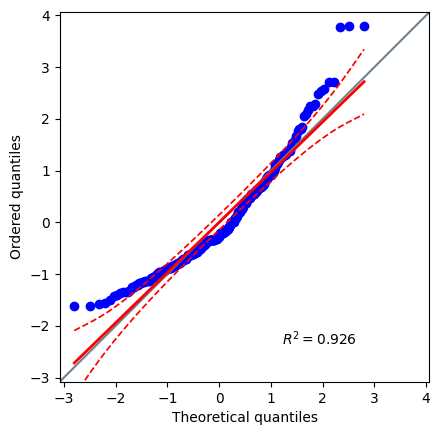

In [ ]:
print('Normality tests for price')
print("{:,.5f}".format(st.kstest(df['price'],'norm').pvalue))
print("{:,.5f}".format(st.shapiro(df['price']).pvalue))
print("{:,.5f}".format(st.jarque_bera(df['price']).pvalue))
print("{:,.5f}".format(st.normaltest(df['price']).pvalue))
print('With very low p-values for KS, Shapiro-Wilk, Jarque-Bera and Anderson-Darling (st.normaltest), \nwe can reject the null hypothesis that variable follows a normal distribution.')
print('\n We can go even further and ilustrate the point:')

plt.show(pg.qqplot(df['price'], dist='norm', confidence=.95))

Normality tests for parking
0.00000
0.00000
0.00000
0.00000
Parking shows very low p-values as well, which means we can reject the null hypothesis that the variable follows a normal distribution.

 The illustration is similar to price:


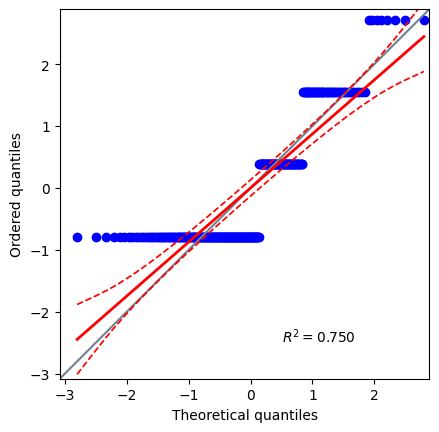

In [ ]:
print('Normality tests for parking')
print("{:,.5f}".format(st.kstest(df['parking'],'norm').pvalue))
print("{:,.5f}".format(st.shapiro(df['parking']).pvalue))
print("{:,.5f}".format(st.jarque_bera(df['parking']).pvalue))
print("{:,.5f}".format(st.normaltest(df['parking']).pvalue))
print('Parking shows very low p-values as well, which means we can reject the null hypothesis that the variable follows a normal distribution.')
print('\n The illustration is weird due to its discrete nature:')

plt.show(pg.qqplot(df['parking'], dist='norm', confidence=.95))

Normality tests for bedrooms
0.00000
0.00000
0.04843
0.04220
Like the other variables, bedrooms shows very low p-values as well, 
indicating we can reject the null hypothesis that the variable follows a normal distribution.

 The illustration is similar to parking:


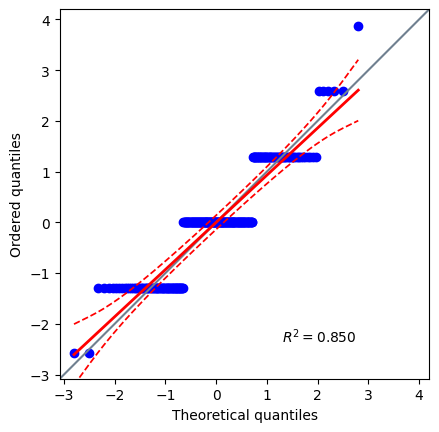

In [ ]:
print('Normality tests for bedrooms')
print("{:,.5f}".format(st.kstest(df['bedrooms'],'norm').pvalue))
print("{:,.5f}".format(st.shapiro(df['bedrooms']).pvalue))
print("{:,.5f}".format(st.jarque_bera(df['bedrooms']).pvalue))
print("{:,.5f}".format(st.normaltest(df['bedrooms']).pvalue))
print('Like the other variables, bedrooms shows very low p-values as well, \nindicating we can reject the null hypothesis that the variable follows a normal distribution.')
print('\n The illustration is similar to parking:')

plt.show(pg.qqplot(df['bedrooms'], dist='norm', confidence=.95))

## One Way ANOVA for price vs parking.
**We begin by dividing the population in houses with 0, 1, 2 and 3 parking slots**

In [42]:
def group(df,filter):
  df0 = df[(df['parking'] == filter)] # Select the rows whose values in the field "parking" are equal to the value filter
  return df0['price'] # Give us the filtered table

g0 = group(df,0) # select those rows with parking = 0 and save it in table called g0
g1 = group(df,1)
g2 = group(df,2)
g3 = group(df,3)

mean_0 = g0.mean()
mean_1 = g1.mean()
mean_2 = g2.mean()
mean_3 = g3.mean()

print("{:,.2f}".format(mean_0), "{:,.2f}".format(mean_1), "{:,.2f}".format(mean_2), "{:,.2f}".format(mean_3))


overall_mean = df['price'].mean()
print("{:,.2f}".format(overall_mean))

SSB = (len(g0)*((mean_0-overall_mean)**2)+
      len(g1)*((mean_1-overall_mean)**2)+
       len(g2)*((mean_2-overall_mean)**2)+
       len(g3)*((mean_3-overall_mean)**2))

print("{:,.2f}".format(SSB))

#============ GROUP 0
lst = []
for item in g0:
  lst.append((item-mean_0)**2)
SSW_0 = np.array(lst).sum()

#============ GROUP 1
lst = []
for item in g1:
  lst.append((item-mean_1)**2)
SSW_1 = np.array(lst).sum()

#============ GROUP 2
lst = []
for item in g2:
  lst.append((item-mean_2)**2)
SSW_2 = np.array(lst).sum()

#============ GROUP 3
lst = []
for item in g3:
  lst.append((item-mean_3)**2)
SSW_3 = np.array(lst).sum()


SSW = SSW_0 + SSW_1 + SSW_2 + SSW_3

print(SSW_0, SSW_1, SSW_2, SSW_3)
print("{:,.2f}".format(SSW))

n = len(df)
k = 4

MSB = SSB/(k-1)
MSW = SSW/(n-k)

print(MSB, MSW)

F = MSB/MSW
print(F)
print("{:,.10f}".format(st.f.sf(F, k-1,n-k)))

st.f_oneway(g0,g1, g2, g3)
print(f'As the p-value {"{:,.10f}".format(st.f.sf(F, k-1,n-k))} is lower than 0.5, we reject the null hypothesis that the differences are not significant.\nTherefore, we conclude parking slots affect the price of houses.')

4,323,661.26 5,204,238.81 6,029,054.35 5,992,875.00
4,878,074.82
124,422,105,085,894.98
341744259695861.0 231612350179104.5 223929769114130.44 105386792875000.0
902,673,171,864,096.00
41474035028631.664 3368183477104.836
12.313472621236533
0.0000001430
As the p-value 0.0000001430 is lower than 0.5, we reject the null hypothesis that the differences are not significant.
Therefore, we conclude parking slots affect the price of houses.


## One Way ANOVA for price vs bedrooms.
**As the range of bedrooms is 5 and the max value is 6, it means that there are houses with 1, 2, 3, 4, 5 and 6 bedrooms. We will begin by dividing the population by the amount of bedrooms.**

In [45]:
def group(df,filter):
  df0 = df[(df['bedrooms'] == filter)] # Select the rows whose values in the field "bedrooms" are equal to the value filter
  return df0['price'] # Give us the filtered table

g1 = group(df,1) # select those rows with bedrooms = 1 and save it in table called g1
g2 = group(df,2)
g3 = group(df,3)
g4 = group(df,4)
g5 = group(df,5)
g6 = group(df,6)

st.f_oneway(g1, g2, g3, g4, g5, g6)
print('Again, a very low p-value, way lower than 0.5, which indicates we reject the null hypothesis of non-significant differences, indicating that the number of bedrooms affect the price.')


Again, a very low p-value, way lower than 0.5, which indicates we reject the null hypothesis of non-significant differences, indicating that the number of bedrooms affect the price.


##Create a linear regression (LR) model based on the indicated variables.
**The regression is price vs area.**

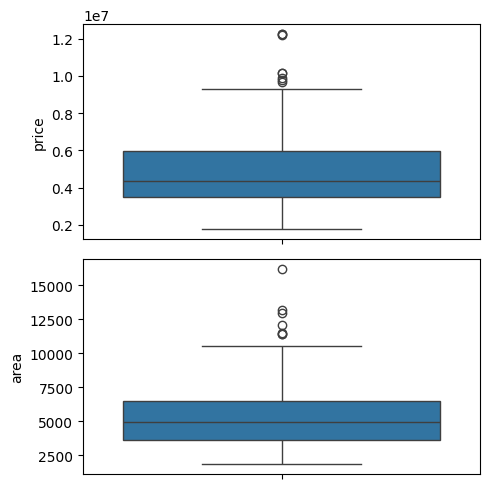

In [49]:
import plotly.graph_objects as go
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import statsmodels.api as sm

fig, axs = plt.subplots(2, figsize = (5,5))
plt1 = sns.boxplot(df['price'], ax = axs[0])
plt2 = sns.boxplot(df['area'], ax = axs[1])
plt.tight_layout()


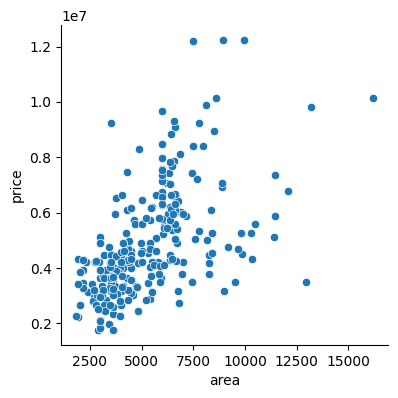

Intercept:  2340290.7249163156
Coefficient: [469.6137867]
Regression Equation: price = 2340290.7249163156 + [469.6137867] * area


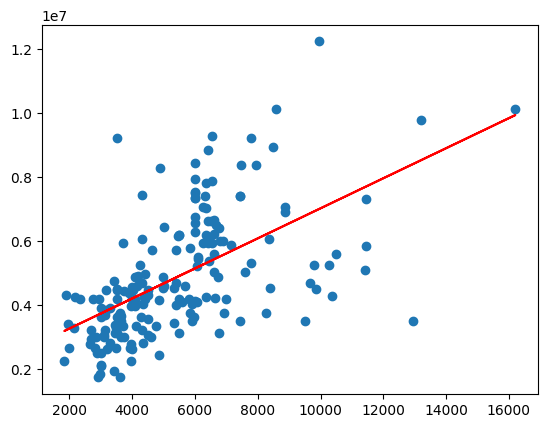

     Actual value  Predicted value
59        2345000     4.049685e+06
139       2240000     3.256038e+06
219       3234000     4.049685e+06
134       3920000     3.347612e+06
189       1820000     3.749132e+06
..            ...              ...
54        5005000     6.167643e+06
148       6790000     8.017921e+06
247       6293000     5.439742e+06
144       7210000     5.946925e+06
42        6510000     4.106039e+06

[82 rows x 2 columns]


In [56]:
sns.pairplot(df, x_vars=['area'], y_vars='price', height=4, aspect=1, kind='scatter')
plt.show()

x = df[['area']]
y = df['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)
slr= LinearRegression()
slr.fit(x_train, y_train)

print('Intercept: ', slr.intercept_)
print('Coefficient:', slr.coef_)

print(f'Regression Equation: price = {slr.intercept_} + {slr.coef_} * area')

plt.scatter(x_train, y_train)
plt.plot(x_train, slr.intercept_ + slr.coef_*x_train, 'r')
plt.show()

y_pred_slr= slr.predict(x_test)
x_pred_slr= slr.predict(x_train)

slr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_slr})
print(slr_diff)

In [58]:
from sklearn.metrics import accuracy_score
print('R squared value of the model: {:.2f}'.format(slr.score(x,y)*100))

meanAbErr = metrics.mean_absolute_error(y_test, y_pred_slr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_slr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_slr))

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)



R squared value of the model: 32.07
Mean Absolute Error: 1260434.413834704
Mean Square Error: 3028990055597.528
Root Mean Square Error: 1740399.3954255236
